## Dual-Doppler Radars Areas Map:

**Based on Brenda's notebook.**

**Hungjui 20220513**

In [146]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [147]:
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patheffects as pe
from matplotlib.colors import ( from_levels_and_colors, Normalize )

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
import cartopy.geodesic as cgds
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import shapely
from pyproj import Geod


In [148]:
from pygc import (great_distance, great_circle)

#### Plotting parameters:

In [149]:
## Set site locations lat/lon:
site_locs = { 'CSAPR2': [-64.73, -32.13]
            , 'CHIVO': [-64.17, -31.63]
            , 'RMA1': [-64.191922, -31.441328]
            }

radar_ranges = { 'CSAPR2': 110
               , 'CHIVO': 150
               , 'RMA1': 117
               }

# print(list(site_locs.keys()))
# for si, sname in enumerate(list(site_locs.keys())):
#     print(sname)

#### Plotting funciton:

In [150]:
def new_map(fig):
    
    # proj = ccrs.LambertConformal( central_longitude=-64.0, cutoff=-60, globe=None )
    # proj = ccrs.LambertCylindrical( central_longitude=0.0, globe=None )
    proj = ccrs.PlateCarree( central_longitude=0.0, globe=None )
    # proj = ccrs.Orthographic(-64, -32)
    
    # ax = fig.add_subplot(1, 1, 1, projection=proj)
    ax = plt.axes(projection=proj)
    
    ## Add background image:
    # ax.stock_img()
    
    ## Add Stamen terrain:
    stamen_terrain = cimgt.Stamen('terrain')
    ax.add_image(stamen_terrain, 8)
    
    ## Set extent:
    # ax.set_global()
    
    ## S. America:
    # ax.set_extent([-30, -90, 20, -60], crs=proj)
    ## CACTI:
    # ax.set_extent([-61.9, -66.5, -29.5, -34.1], crs=proj)
    ax.set_extent([-62.4, -66.3, -29.6, -33.7], crs=proj)
    # ax.set_extent([-61.4, -67.3, -28.6, -34.7], crs=proj)
    
    ## Add coast lines:
    ax.coastlines('10m', 'black', linewidth=1)
    
    ## Grab state shapefile:
    state_borders = cfeat.NaturalEarthFeature( category='cultural' # 'physical'
                                             , name='admin_1_states_provinces_lines'
                                             # , name='geography_regions_elevation_points'
                                             , scale='110m'
                                             , facecolor='none'
                                             , edgecolor='gray'
                                             # , alpha=0.2
                                             )
    ## Add features:
    # ax.add_feature(cfeat.BORDERS)
    # ax.add_feature(cfeat.LAND)
    # ax.add_feature(cfeat.COASTLINE)
    # ax.add_feature(cfeat.OCEAN, edgecolor=None) #, fc='none')
    # ax.add_feature(cfeat.GSHHSFeature(scale='auto', levels=None))
    # ax.add_feature(state_borders, linewidth=0.8)
    
    ## Add the gridlines:
    latlon_grid_int = 1
    ax_gl = ax.gridlines( crs=proj
                        , linewidth=0.5
                        , color='#454545' 
                        , alpha=0.9
                        , linestyle='--'
                        , draw_labels=True 
                        , dms=True
                        # , x_inline=False 
                        # , y_inline=False
                        , xlocs=np.arange(-180, 181, latlon_grid_int)
                        , ylocs=np.arange(-90, 91, latlon_grid_int)
                        )
    ax_gl.top_labels = False
    ax_gl.right_labels = False
    ax_gl.bottom_labels = True
    ax_gl.left_labels = True
    ax_gl.xlabel_style = {'size': 14, 'weight': 'bold'}
    ax_gl.ylabel_style = {'size': 14, 'weight': 'bold'}
    
    
    return ax

### Plotting 1: Radar spatial coverage:

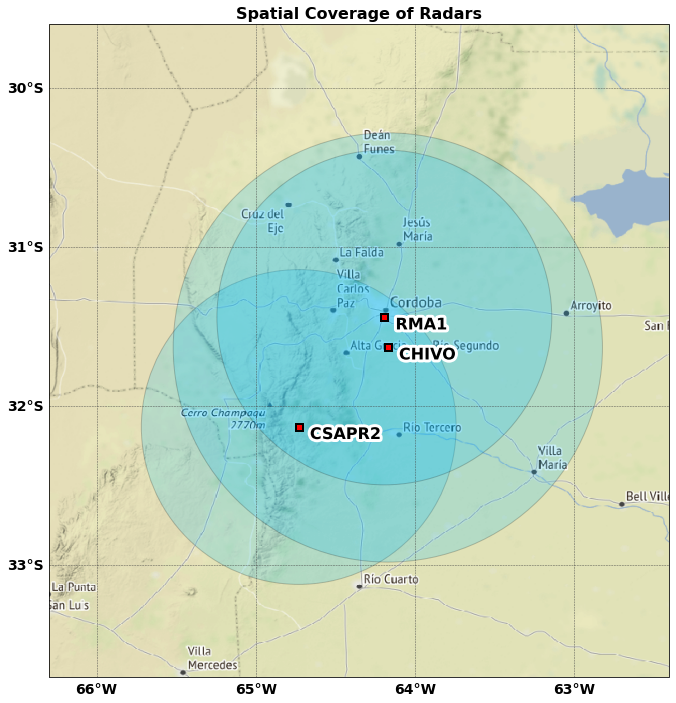

In [151]:
fig = plt.figure(figsize=(12,12))
ax1 = new_map(fig)


## Plot radar ranges:
for si, sname in enumerate(list(site_locs.keys())):
    
    ## Use Great-circle distance:
    ax1.add_patch( plt.Circle( (site_locs[sname][0], site_locs[sname][1])
                             , (radar_ranges[sname]*180)/(6371.009*math.pi)
                             , facecolor='deepskyblue'
                             , edgecolor='k'
                             , alpha=0.2
                             )
                 )
    # print((radar_ranges[sname]*180)/(6371.009*math.pi))
    
    ## Use Tissot:
#     ax1.tissot( rad_km=radar_ranges[sname]
#               , lons=site_locs[sname][0]
#               , lats=site_locs[sname][1]
#               , n_samples=120
#               # , color='skyblue'
#               , edgecolor='k'
#               , alpha=0.2
#               )
    
    ## Use geo:
#     circle_points = cgds.Geodesic().circle( lon=site_locs[sname][0]
#                                           , lat=site_locs[sname][1]
#                                           , radius=radar_ranges[sname]*1e3
#                                           , n_samples=100
#                                           , endpoint=False
#                                           )
#     geom = shapely.geometry.Polygon(circle_points)
#     ax1.add_geometries( (geom,)
#                       # , ccrs.LambertConformal( central_longitude=-64.0, cutoff=-60, globe=None )
#                       , crs=ccrs.PlateCarree(central_longitude=0, globe=None)
#                       # , crs=ccrs.Orthographic(-64, -32) 
#                       , facecolor='none'
#                       , edgecolor='red'
#                       , linewidth=2)
    

## Plot site locations:
for si, sname in enumerate(list(site_locs.keys())):
    
    ## Site locations:
    plt.plot( site_locs[sname][0], site_locs[sname][1]
            # , color='k'
            , marker='s'
            , markersize=7
            , mec='k'
            , mew=2
            , mfc='r'
            # , markevery=[0,-1]
            # , linewidth=1.0
            # , linestyle='--'
            )
    
    ## Site names:
    plt.text( site_locs[sname][0], site_locs[sname][1], '  ' + sname + '  '
            , fontsize=16
            , fontweight='bold'
            # , backgroundcolor='w'
            , va='top'
            , path_effects=[pe.withStroke(linewidth=6, foreground='w')]
            )
    
cf1_title = plt.title( 'Spatial Coverage of Radars'
                     ,fontsize=16
                     ,fontweight='bold'
                     )


## Save figure:
plt.savefig( 'radar_spatial_coverage.png'
           , bbox_inches='tight'
           , dpi=300
           )


### Plotting 2: Radar Dual-Doppler lobes:

#### Function for Great-circle distance:

In [108]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    
    re = 6371.009
    
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return c * re

# aa = haversine(site_locs['CSAPR2'][1], site_locs['CSAPR2'][0], site_locs['CHIVO'][1], site_locs['CHIVO'][0])
# print(aa)

In [122]:
# bb = great_distance( start_latitude=site_locs['CSAPR2'][1]
#                    , start_longitude=site_locs['CSAPR2'][0]
#                    , end_latitude=site_locs['CHIVO'][1]
#                    , end_longitude=site_locs['CHIVO'][0]
#                    )
# bb['distance']/1e3

#### Function for Dual-Doppler lobes:

In [172]:
def dual_doppler_lobe( radar1_lat, radar1_lon, radar2_lat, radar2_lon, beam_cross_ang ):
    
    ## 1/2 the distance between the radars pair:
    dd_dict = great_distance( start_latitude=radar1_lat
                            , start_longitude=radar1_lon
                            , end_latitude=radar2_lat
                            , end_longitude=radar2_lon
                            )
    dd = dd_dict['distance']/(1e3)
    
    ## Azimuth between the radars pair:
    az_ang = dd_dict['azimuth']
    
    ## Dual-Doppler lobe circle radius:
    rr = dd*(1./np.sin(np.deg2rad(beam_cross_ang)))
    
    ## The center of radars pair:
    cent_lat = (radar1_lat+radar2_lat)/2
    cent_lon = (radar1_lon+radar2_lon)/2
    
    ## The distance from the center of radars pair to the center of the Dual-Doppler lobe circles:
    cc_dis = dd_dict['distance']*(1/np.tan(np.deg2rad(beam_cross_ang)))
    
    ## The 2 centers for the Dual-Doppler lobe circles:
    cent_lobe_dict = great_circle( distance=cc_dis
                                 , azimuth=[ az_ang+90, az_ang+270 ]
                                 , latitude=cent_lat
                                 , longitude=cent_lon
                                 )
    
    return cent_lobe_dict['latitude'], cent_lobe_dict['longitude'], rr
    
    
# lobe_info = dual_doppler_lobe( site_locs['CSAPR2'][1]
#                              , site_locs['CSAPR2'][0]
#                              , site_locs['CHIVO'][1]
#                              , site_locs['CHIVO'][0]
#                              , 30
#                              )
# lobe_info

0
[0, 2]
-32.13
-64.73
-31.441328
-64.191922
(array([-32.57687327, -30.97908959]), array([-63.05470633, -65.8432393 ]), 183.61132386454184)
-63.05470633187954
-32.57687327263703
-65.84323930355067
-30.979089594683803
183.61132386454184


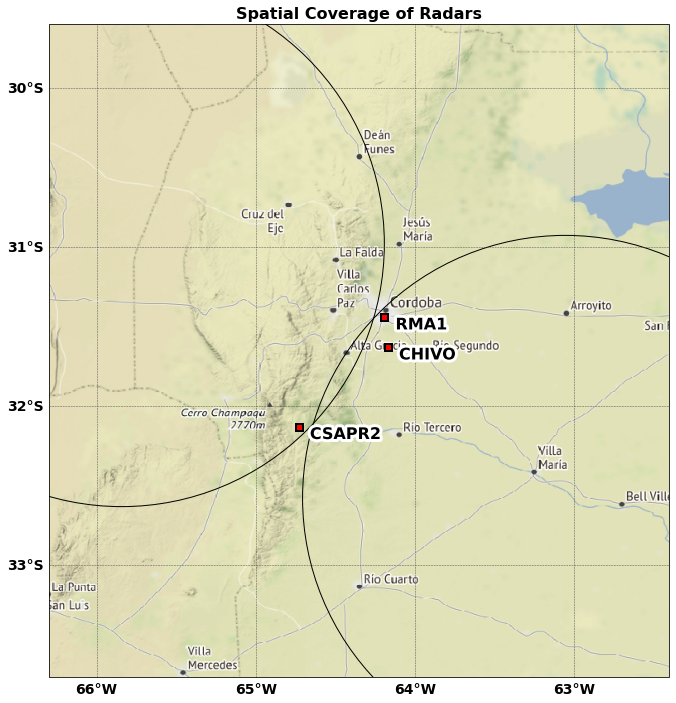

In [175]:
fig = plt.figure(figsize=(12,12))
ax1 = new_map(fig)


## Calculate the dual-Doppler lobes for radar pairs:
radar_pairs = [ [0, 1]
              , [1, 2]
              , [0, 2]
              ] 
radar_pairs = [ [0, 2] ]

## Plot dual-Doppler lobes:
for pairi, pair_list in enumerate(radar_pairs):
    
    print(pairi)
    print(pair_list)
    print(site_locs[list(site_locs.keys())[pair_list[0]]][1])
    print(site_locs[list(site_locs.keys())[pair_list[0]]][0])
    print(site_locs[list(site_locs.keys())[pair_list[1]]][1])
    print(site_locs[list(site_locs.keys())[pair_list[1]]][0])
    
    ## Get dual-Doppler lobe information:
    lobe_info = dual_doppler_lobe( site_locs[list(site_locs.keys())[pair_list[0]]][1]
                                 , site_locs[list(site_locs.keys())[pair_list[0]]][0]
                                 , site_locs[list(site_locs.keys())[pair_list[1]]][1]
                                 , site_locs[list(site_locs.keys())[pair_list[1]]][0]
                                 , 30
                                 )
    print(lobe_info)
    print(lobe_info[1][0])
    print(lobe_info[0][0])
    print(lobe_info[1][1])
    print(lobe_info[0][1])
    print(lobe_info[2])
    
    
    ## Plot the 2 lobe circles:
    ax1.add_patch( plt.Circle( (lobe_info[1][0], lobe_info[0][0])
                             , (lobe_info[2]*180)/(6371.009*math.pi)
                             , color='k'
                             , fill=False 
                             )
                 )
    ax1.add_patch( plt.Circle( (lobe_info[1][1], lobe_info[0][1])
                             , (lobe_info[2]*180)/(6371.009*math.pi)
                             , color='k'
                             , fill=False 
                             )
                 )
    

## Plot site locations:
for si, sname in enumerate(list(site_locs.keys())):
    
    ## Site locations:
    plt.plot( site_locs[sname][0], site_locs[sname][1]
            # , color='k'
            , marker='s'
            , markersize=7
            , mec='k'
            , mew=2
            , mfc='r'
            # , markevery=[0,-1]
            # , linewidth=1.0
            # , linestyle='--'
            )
    
    ## Site names:
    plt.text( site_locs[sname][0], site_locs[sname][1], '  ' + sname + '  '
            , fontsize=16
            , fontweight='bold'
            # , backgroundcolor='w'
            , va='top'
            , path_effects=[pe.withStroke(linewidth=6, foreground='w')]
            )
    
cf1_title = plt.title( 'Spatial Coverage of Radars'
                     ,fontsize=16
                     ,fontweight='bold'
                     )


## Save figure:
plt.savefig( 'radar_dual_doppler_area.png'
           , bbox_inches='tight'
           , dpi=300
           )
